<a href="https://colab.research.google.com/github/pvuppal/prudhvi/blob/main/PRUDHVIVUPPALAPATI_ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn import metrics

In [8]:
from sklearn.metrics import recall_score

In [9]:
from sklearn.metrics import precision_score

In [10]:
from sklearn.metrics import f1_score

In [13]:
data = pd.read_csv('/content/stroke.csv')

In [14]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
data=data.drop_duplicates()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
data=data.fillna(method='ffill')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [20]:
data=data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=enc.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [22]:
data=data.drop(['id'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [23]:
y=data['stroke']
x=data.drop(['stroke'],axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=Normalizer().fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Model:
Accuracy: 0.939
Precision: 0.470
Recall: 0.500
F1 Score: 0.484


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


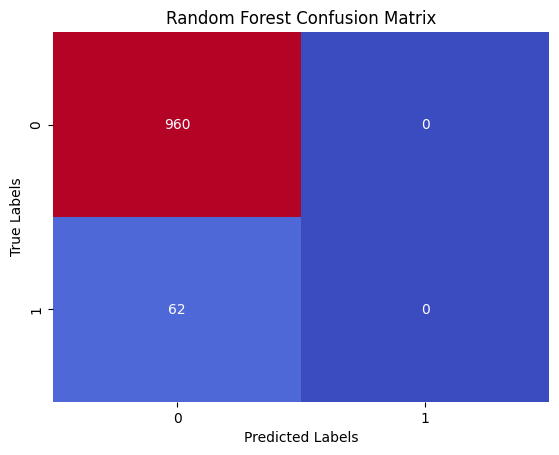

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest
rf_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier(n_jobs=1)
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=50, cv=5, verbose=1, n_jobs=2, random_state=42)
rf_random_search.fit(x_train, y_train)
best_rf_model = rf_random_search.best_estimator_

# Evaluate and print results for Random Forest
rf_y_pred = best_rf_model.predict(x_test)
print("Random Forest Model:")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, rf_y_pred)))
print("Precision: {:.3f}".format(precision_score(y_test, rf_y_pred, average='macro')))
print("Recall: {:.3f}".format(recall_score(y_test, rf_y_pred, average='macro')))
print("F1 Score: {:.3f}".format(f1_score(y_test, rf_y_pred, average='macro')))

# Plot confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()
# Print classification report for Random Forest
rf_class_report = classification_report(y_test, rf_y_pred)
print("Random Forest Classification Report:\n", rf_class_report)

In [ ]:
# SVM
svm_model = SVC()
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4, 5]
}
svm_random_search = RandomizedSearchCV(svm_model, svm_param_dist, n_iter=50, cv=5, verbose=1, n_jobs=2, random_state=42)
svm_random_search.fit(x_train, y_train)
best_svm_model = svm_random_search.best_estimator_

# Evaluate and print results for SVM
svm_y_pred = best_svm_model.predict(x_test)
print("\nSVM Model:")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, svm_y_pred)))
print("Precision: {:.3f}".format(precision_score(y_test, svm_y_pred, average='macro')))
print("Recall: {:.3f}".format(recall_score(y_test, svm_y_pred, average='macro')))
print("F1 Score: {:.3f}".format(f1_score(y_test, svm_y_pred, average='macro')))
# Print classification report for SVM
svm_class_report = classification_report(y_test, svm_y_pred)
print("\nSVM Classification Report:\n", svm_class_report)
# Plot confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix')
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=50, cv=5, verbose=1, n_jobs=2, random_state=42)
gb_random_search.fit(x_train, y_train)
best_gb_model = gb_random_search.best_estimator_


# Evaluate and print results for Gradient Boosting
gb_y_pred = best_gb_model.predict(x_test)
print("\nGradient Boosting Model:")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, gb_y_pred)))
print("Precision: {:.3f}".format(precision_score(y_test, gb_y_pred, average='macro')))
print("Recall: {:.3f}".format(recall_score(y_test, gb_y_pred, average='macro')))
print("F1 Score: {:.3f}".format(f1_score(y_test, gb_y_pred, average='macro')))
# Plot confusion matrix for Gradient Boosting
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()
# Print classification report for Gradient Boosting
gb_class_report = classification_report(y_test, gb_y_pred)
print("\nGradient Boosting Classification Report:\n", gb_class_report)